In [114]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random
import cmath

def pdf_lorentz(a,x):            # Lorentzian Probability Distribution
    y=a/(x**2+a**2)
    return y

def omega_list(no_of_osc):           # To generate a lorentzian weighted distribution of w.
    N=0 
    a=1
    x_list=[]
    y_list=[]
    while(N!=no_of_osc):
        x=random.uniform(-8,8)   # Generate a uniform random number between some apt finite range of x.
        y=random.uniform(0,1)    # Generate a uniform random number between 0 and y_max
        if(pdf_lorentz(a,x)>y):      # if the random y value < pdf(x), then accept that point.
            x_list.append(x)
            N=N+1
    x_list=np.array(x_list)
    return x_list

def rpsi(theta_list):                 # to find r(t) and psi(t) for a given time t 
    z=np.mean(np.exp([complex(0,theta) for theta in theta_list]))
    r=abs(z)
    psi=cmath.phase(z)    
    return r,psi

def evolution(theta_list,w_list,k,r,psi,dt):   # Integration function for theta_i's
    new_theta=np.add(theta_list,dt*np.add(w_list,k*r*np.sin(np.subtract(psi,theta_list))))
    return new_theta

def random_theta_i(N):
    anglelist=np.zeros(N, dtype=float)
    for i in range(N):
        theta=random.random()*2*np.pi
        anglelist[i]+=theta
    return anglelist

def k_cycle(k,N):
    w_list=omega_list(N)               # Initial Distribution of angular frequencies.
    theta_list=random_theta_i(N)   # Initial Random Distribution of Phases.
    
    start = timer()
    for t in range(int(time_steps)):
        r,psi=rpsi(theta_list)
        theta_list=evolution(theta_list,w_list,k,r,psi,dt)      # New theta Phase list.
        rlist[t]+=r
    end = timer()
    print("Runtime= ", end-start, " secs")
    print(r)
    

Runtime for pdf=  0.022506900000735186  secs
Runtime=  20.15098649999709  secs
0.44143138890945527 0.4513009523525306


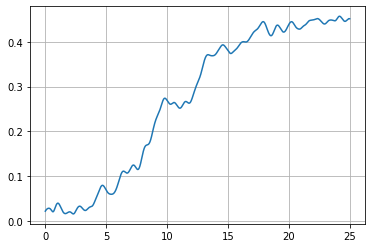

In [131]:
dt=10**(-3)           # delta t
k=2.2                   # Coupling Constant K
time_steps=2.5*(10**4)      # Number of Time Steps
N=2*10**3               # Number of Oscillators
rlist=np.zeros(int(time_steps), dtype=float)
start = timer()
w_list=omega_list(N)               # Initial Distribution of angular frequencies.
end = timer()
print("Runtime for pdf= ", end-start, " secs")
theta_list=random_theta_i(N)   # Initial Random Distribution of Phases.

start = timer()
for t in range(int(time_steps)):
    r,psi=rpsi(theta_list)
    theta_list=evolution(theta_list,w_list,k,r,psi,dt)      # New theta Phase list.
    rlist[t]+=r
end = timer()
print("Runtime= ", end-start, " secs")
plt.plot(np.arange(time_steps)*dt,rlist)
plt.grid(True)
mean=np.mean(rlist[int(np.floor(len(rlist)*3/4)):int(len(rlist))])   # Mean over the last 25% elements 
print(mean,r)
